In [ ]:
import numpy as np
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.9 MB/s eta 0:00:00


In [ ]:
# Define fuzzy variables
temperature = Antecedent(np.arange(15, 31, 1), 'temperature')
light_level = Antecedent(np.arange(0, 101, 1), 'light_level')
fan_speed = Consequent(np.arange(0, 101, 1), 'fan_speed')
light_brightness = Consequent(np.arange(0, 101, 1), 'light_brightness')



In [ ]:
# Define membership functions for inputs
temperature['cold'] = fuzz.trapmf(temperature.universe, [15, 15, 18, 22])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [18, 22, 26])
temperature['hot'] = fuzz.trapmf(temperature.universe, [22, 26, 30, 30])

light_level['dark'] = fuzz.trapmf(light_level.universe, [0, 0, 20, 50])
light_level['medium'] = fuzz.trimf(light_level.universe, [20, 50, 80])
light_level['bright'] = fuzz.trapmf(light_level.universe, [50, 80, 100, 100])



In [ ]:
# Define membership functions for outputs
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])

light_brightness['dim'] = fuzz.trimf(light_brightness.universe, [0, 25, 50])
light_brightness['normal'] = fuzz.trimf(light_brightness.universe, [25, 50, 75])
light_brightness['bright'] = fuzz.trimf(light_brightness.universe, [50, 75, 100])


In [ ]:
# Define fuzzy rules
rule1 = Rule(temperature['cold'], fan_speed['low'])
rule2 = Rule(temperature['comfortable'], fan_speed['medium'])
rule3 = Rule(temperature['hot'], fan_speed['high'])
rule4 = Rule(light_level['dark'], light_brightness['bright'])
rule5 = Rule(light_level['medium'], light_brightness['normal'])
rule6 = Rule(light_level['bright'], light_brightness['dim'])



In [ ]:
# Build the control system
control_system = ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
simulation = ControlSystemSimulation(control_system)

In [ ]:
# Simulate with example inputs
simulation.input['temperature'] = 25
simulation.input['light_level'] = 40


In [ ]:
# Compute outputs
simulation.compute()

print(f"Fan Speed: {simulation.output['fan_speed']:.2f}")
print(f"Light Brightness: {simulation.output['light_brightness']:.2f}")

Fan Speed: 67.76
Light Brightness: 59.09


Plotting Membership Functions...


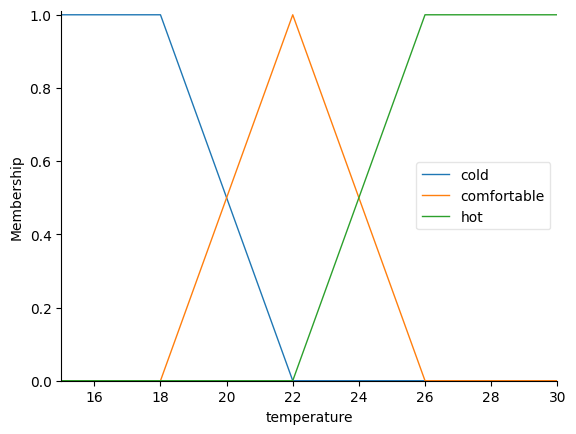

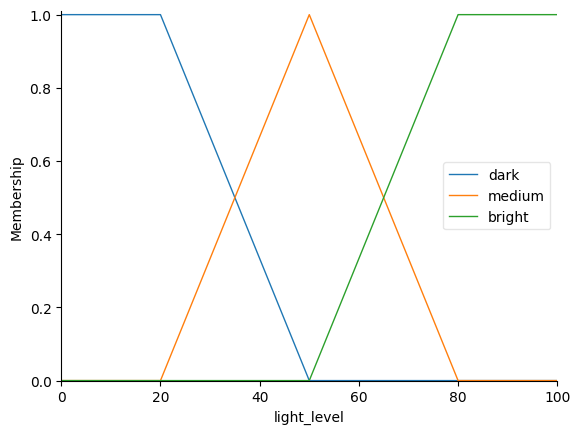

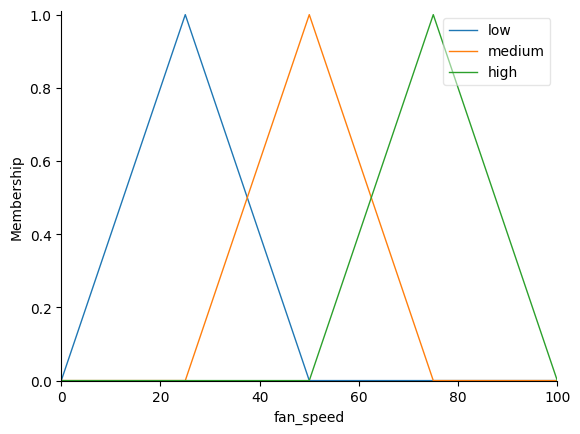

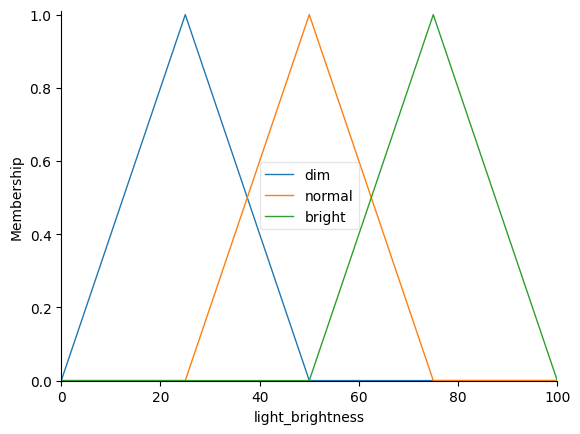


Plotting Rule Activation...
Inputs -> Temperature: 25, Light Level: 40
Fan Speed: 67.76
Light Brightness: 59.09

Plotting Control Surface for Fan Speed...


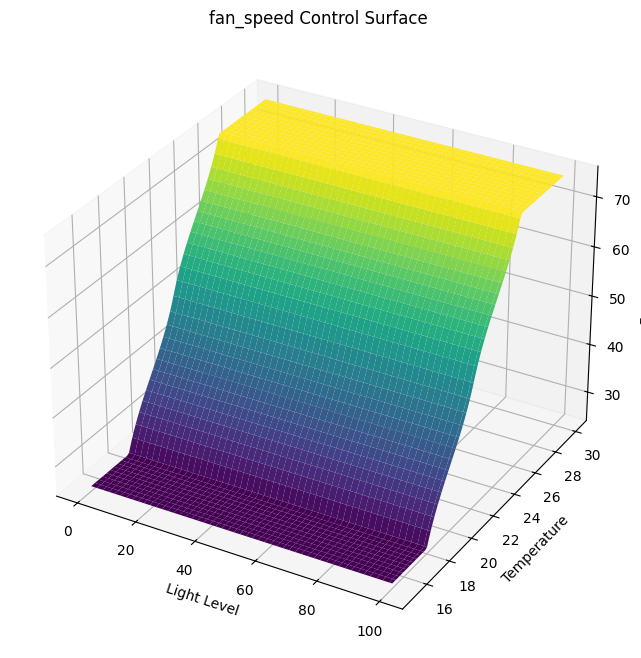


Plotting Control Surface for Light Brightness...


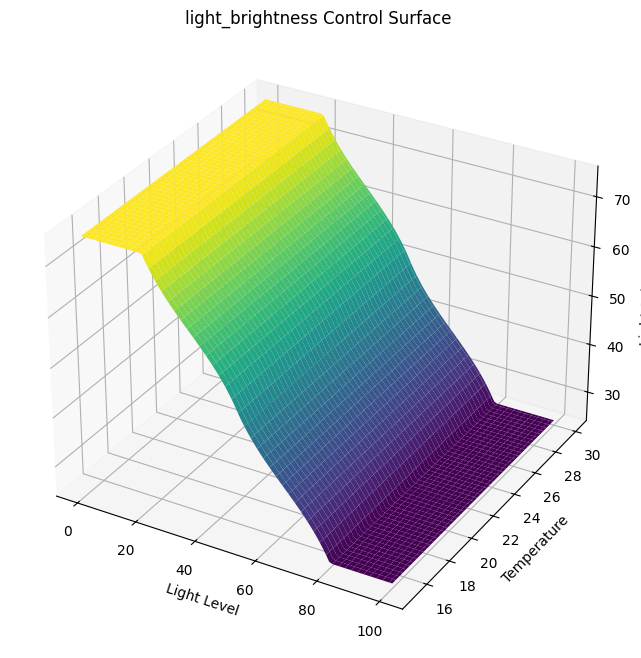

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membership function visualization
def plot_membership_functions():
    temperature.view()
    light_level.view()
    fan_speed.view()
    light_brightness.view()
    plt.show()

# Rule activation visualization
def plot_rule_activation(simulation, temp, light):
    simulation.input['temperature'] = temp
    simulation.input['light_level'] = light
    simulation.compute()

    # Plot rule activation
    print(f"Inputs -> Temperature: {temp}, Light Level: {light}")
    print(f"Fan Speed: {simulation.output['fan_speed']:.2f}")
    print(f"Light Brightness: {simulation.output['light_brightness']:.2f}")

# Control surface visualization
def plot_control_surface(simulation, input_var1, input_var2, output_var, label1, label2, label3):
    var1_vals = np.linspace(input_var1.universe.min(), input_var1.universe.max(), 100)
    var2_vals = np.linspace(input_var2.universe.min(), input_var2.universe.max(), 100)
    output_vals = np.zeros((100, 100))

    # Calculate output for each combination of inputs
    for i, var1 in enumerate(var1_vals):
        for j, var2 in enumerate(var2_vals):
            simulation.input[input_var1.label] = var1
            simulation.input[input_var2.label] = var2
            simulation.compute()
            output_vals[i, j] = simulation.output[output_var.label]

    # Create control surface plot
    X, Y = np.meshgrid(var2_vals, var1_vals)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, output_vals, cmap='viridis')
    ax.set_title(f"{output_var.label} Control Surface")
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)
    plt.show()

# Visualize Membership Functions
print("Plotting Membership Functions...")
plot_membership_functions()

# Visualize Rule Activation Example
print("\nPlotting Rule Activation...")
plot_rule_activation(simulation, temp=25, light=40)

# Visualize Control Surface for Fan Speed
print("\nPlotting Control Surface for Fan Speed...")
plot_control_surface(
    simulation,
    temperature,
    light_level,
    fan_speed,
    "Light Level",
    "Temperature",
    "Fan Speed"
)

# Visualize Control Surface for Light Brightness
print("\nPlotting Control Surface for Light Brightness...")
plot_control_surface(
    simulation,
    temperature,
    light_level,
    light_brightness,
    "Light Level",
    "Temperature",
    "Light Brightness"
)


Evaluating solution 0: [17. 19. 21. 23. 22. 25. 28. 26. 28. 30. 30.]
Membership values for temperature:
Cold: [0.  0.  0.  0.5 1.  1.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.33333333 0.66666667 1.         0.66666667
 0.33333333 0.         0.         0.        ]
Hot: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.  1. ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.0}
Fitness value: -10.0
Evaluating solution 1: [17. 19. 21. 23. 22. 25. 28. 26. 26. 30. 30.]
Membership values for temperature:
Cold: [0.  0.  0.  0.5 1.  1.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.33333333 0.66666667 1.         0.66666667
 0.33333333 0.         0.         0.        ]
Hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
Simulation inputs: temperature : 25

Simulation output

2024-12-19 14:29:04,361 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}



Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.0}
Fitness value: -10.0
Evaluating solution 1: [17. 19. 19. 23. 18. 25. 25. 22. 28. 28. 30.]
Membership values for temperature:
Cold: [0.   0.   0.   0.5  1.   0.75 0.5  0.25 0.   0.   0.   0.   0.   0.
 0.   0.  ]
Comfortable: [0.         0.         0.         0.         0.14285714 0.28571429
 0.42857143 0.57142857 0.71428571 0.85714286 1.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.16666667 0.33333333 0.5        0.66666667
 0.83333333 1.         0.5        0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 60.41666666666666}
Fitness value: -0.4166666666666572
Evaluating solution 2: [17. 19. 19. 23. 18. 25. 28. 22. 26. 30. 30.]
Membership values for temperature:
Cold: [0.   0.   0.   0.5  1.   0.75 0.5  0.25 0.   0.   0.   0.   0.   0.
 0.   0.  ]
Comfortable: [0.         0.     

pyswarms.single.global_best:   0%|          |0/50

Membership values for temperature:
Cold: [0.         0.50046729 1.         1.         1.         1.
 1.         0.97368474 0.72504522 0.47640571 0.22776619 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.23222606 0.77100772 0.86391773 0.62724522
 0.39057272 0.15390021 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21109977 0.51119607 0.81129236
 1.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 54.6541686785539}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.001019
 0.56040251 1.         0.31981781 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.29668984 0.98938964 0.78601025 0.58263085 0.37925146 0.175

pyswarms.single.global_best:   0%|          |0/50, best_cost=3.12


Simulation outputs: {'fan_speed': 43.55432411286859}
Membership values for temperature:
Cold: [0.         0.46160466 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.07311222 0.        ]
Comfortable: [0.         0.         0.         0.         0.17653918 0.46386782
 0.75119645 0.96328861 0.68948693 0.41568525 0.14188357 0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.27818019 0.60113077 0.92408134 1.
 0.82295123 0.39252108 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 49.9284823982134}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.         0.         0.17873022 0.59443118 1.         0.43052209
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.58756522 0.88446757
 0.75

pyswarms.single.global_best:   2%|▏         |1/50, best_cost=3.12

Membership values for temperature:
Cold: [0.         0.07934583 0.36494323 0.65054064 0.93613804 1.
 1.         1.         0.22872226 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.18055867 0.38323318
 0.58590769 0.7885822  0.99125671 0.86016493 0.71402546 0.567886
 0.42174653 0.27560707 0.1294676  0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.26358215 1.
 1.         0.30105167 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 57.63071523555539}
Membership values for temperature:
Cold: [0.         0.07516409 0.34335417 0.61154426 0.87973434 1.
 1.         0.50238525 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.92854544 0.77199724 0.61544905 0.45890085 0.30235266
 

pyswarms.single.global_best:   6%|▌         |3/50, best_cost=0.16

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 58.293339064260536}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.60553896 1.         1.         1.         0.73221342 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.05052195
 0.20564598 0.36077002 0.51589406 0.67101809 0.82614213 0.98126617
 0.65463665 0.26183603 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.22283829
 0.9629797  0.21064423 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 37.81455871234353}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.         1.         1.         1.         1.         1.
 1.         0.6750126  0.28928647 0.        ]
Comfortable: [0.         0.         0. 

pyswarms.single.global_best:   6%|▌         |3/50, best_cost=0.16

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.00000000000003}
Membership values for temperature:
Cold: [0.         0.         0.45007121 1.         1.         1.
 0.84495272 0.65113622 0.45731973 0.26350323 0.06968674 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.02487194 0.57073861
 0.97625362 0.86508922 0.75392482 0.64276042 0.53159602 0.42043162
 0.30926722 0.19810282 0.08693841 0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.42995096
 1.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 46.99432985298007}
Membership values for temperature:
Cold: [0.         0.         0.         0.1359973  0.43724021 0.73848313
 1.         0.74269391 0.3131721  0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.     

pyswarms.single.global_best:  10%|█         |5/50, best_cost=0.16

Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.09246109 0.3683156  0.64417011 0.92002462 1.         0.67120565
 0.17705287 0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02974626 0.33705451 0.64436275
 0.951671   0.49943186 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43504226 0.97197533
 1.         0.00678221 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 45.55418813093881}
Membership values for temperature:
Cold: [0.         0.02929499 0.32897635 0.62865772 0.92833908 0.98056973
 0.68260442 0.38463911 0.0866738  0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=0.16


Membership values for temperature:
Cold: [0.         0.         0.         0.05733302 0.50771045 0.95808789
 1.         1.         0.11202619 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.90803626 0.5640715  0.22010674 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18673666 1.
 1.         0.27032916 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.00000000000003}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.73657378
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.91986124 0.71713501
 0.51440877 0.31168253 0.10895629 0.         0.         0

pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.88089882116958}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.25467512 0.5429543
 0.83123349 1.         1.         1.         0.96324813 0.76924417
 0.57524021 0.38123625 0.18723229 0.        ]
Comfortable: [0.         0.         0.         0.         0.05181909 0.17938483
 0.30695058 0.43451632 0.56208206 0.6896478  0.81721355 0.94477929
 0.14224928 0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33144613 1.
 1.         0.05060365 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 44.730730425576205}
Membership values for temperature:
Cold: [0.         0.22863265 0.66979659 1.         1.         1.
 1.         0.89930987 0.48115989 0.0630099  0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.     

pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.00000000000003}
Membership values for temperature:
Cold: [0.         0.         0.21717693 0.8946158  1.         0.82957703
 0.56031534 0.29105365 0.02179196 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.04399298 0.17382156
 0.30365015 0.43347874 0.56330733 0.69313592 0.82296451 0.95279309
 0.75503396 0.37010357 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24105264 1.
 0.22345158 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 56.8722078849889}
Membership values for temperature:
Cold: [0.         0.03909811 0.27169628 0.50429446 0.73689263 0.96949081
 1.         0.61655526 0.2181272  0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.      

pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 53.327390697007395}
Membership values for temperature:
Cold: [0.         0.         0.         0.73623571 1.         0.86706422
 0.25862776 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.41749216 0.89915371
 0.71807561 0.53699751 0.35591941 0.17484131 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33297432 0.91496167
 0.34450664 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.0}
Membership values for temperature:
Cold: [0.         0.29774111 0.60063163 0.90352215 1.         0.80064949
 0.54983212 0.29901475 0.04819739 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.      

pyswarms.single.global_best:  30%|███       |15/50, best_cost=0.0492

Membership values for temperature:
Cold: [0.         0.         0.         0.49910585 1.         0.90260135
 0.52002957 0.13745779 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.63598432
 0.78611052 0.48370709 0.18130367 0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.65288191 1.         0.
 0.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.0}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.20242174 0.45932996
 0.71623817 0.97314639 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.07918006 0.34870293 0.6182258  0.88774866
 0. 

pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=0.0492

Membership values for temperature:
Cold: [0.        0.        0.        0.        0.        1.        1.
 0.3805834 0.        0.        0.        0.        0.        0.
 0.        0.       ]
Comfortable: [0.         0.         0.         0.         0.33596211 0.99411784
 0.8248801  0.64818099 0.47148188 0.29478276 0.11808365 0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.61909373
 1.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 49.99999999999998}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.41794643
 0.84185339 0.92624325 0.76273225 0.59922125 0.43571025 0.27219924
 0.10868824 0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.08060836 0.90146726 0.82902914 0.63473609 0.44044304 0.246149

pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=0.0492

Membership values for temperature:
Cold: [0.         0.         0.         1.         1.         1.
 1.         0.18972085 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.29143785 0.60535804 0.91927822 0.09244163 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.0221539 0.596898  1.        1.        0.
 0.        0.       ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 74.99999999999996}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.17671355
 0.7931887  1.         0.82803556 0.60019554 0.37235553 0.14451552
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.21556121
 0.49854509 0

pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 62.749072456039464}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.         0.91859652 0.70939635 0.28972325 0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.38483593 0.80011043 0.85937598 0.58824481 0.31711365
 0.04598248 0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.37857995 0.96948989
 0.1348135  0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 60.26126732810446}
Membership values for temperature:
Cold: [0.         0.         0.31551796 1.         0.95639983 0.86492565
 0.77345147 0.68197729 0.59050311 0.49902893 0.40755475 0.31608057
 0.22460639 0.13313221 0.04165803 0.        ]
Comfortable: [0.         0.    

pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.92634920252327}
Membership values for temperature:
Cold: [0.         0.         1.         1.         1.         0.87688825
 0.73131295 0.58573765 0.44016235 0.29458705 0.14901175 0.00343645
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.06451929
 0.262963   0.4614067  0.6598504  0.8582941  0.24124474 0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.69120182 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 40.73381835069196}
Membership values for temperature:
Cold: [0.         0.         0.         0.36742928 1.         0.73494188
 0.2662022  0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.     

pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 60.42880785308085}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.1520622
 1.         1.         1.         1.         0.636584   0.15908936
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.83879813 0.
 0.         0.         0.         0.        ]
Hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 38.33277565263651}
Membership values for temperature:
Cold: [0.         0.         0.16828769 0.64193592 1.         0.76968063
 0.53664034 0.30360004 0.07055975 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.65877986 0.37111984
 0.         0.  

pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.64489630708346}
Membership values for temperature:
Cold: [0.         0.         0.         0.08902636 1.         1.
 1.         1.         0.63084944 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.21521246 0.49179543 0.76837839 0.93240754 0.51660768 0.10080782
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44781101 0.89284631
 0.36492146 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 61.76670405038961}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.2371341  0.78890283
 1.         1.         0.32434681 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.  

pyswarms.single.global_best:  50%|█████     |25/50, best_cost=0.0492


Cold: [0.         0.         0.         0.         1.         1.
 1.         1.         1.         0.60718425 0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.21652967 0.92011374 0.78777998 0.65544622 0.52311246
 0.3907787  0.25844494 0.12611118 0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.06891284 0.44527189 0.82163095 1.
 0.87899718 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 63.178976584942376}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.35051962
 1.         0.71715163 0.19598463 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.08017069 0.34530994 0.61044918 0.87558843 0.62283764 0.
 0.         0.         0.         0.    

pyswarms.single.global_best:  50%|█████     |25/50, best_cost=0.0492


Membership values for temperature:
Cold: [0.         0.         0.         0.         0.23988759 0.4850952
 0.73030282 0.97551043 1.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.1080211  0.35303135 0.5980416  0.84305186 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.98446123 0.
 0.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.0}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.95974059
 1.         1.         1.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.04213549
 0.18857657 0.33501764 0.48145872 0.6278998  0.77434088 0.92078195
 0.0

pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=0.0492


Cold: [0.         0.12594911 0.63107079 1.         1.         1.
 1.         1.         0.31586112 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.22003298 0.47939601
 0.73875904 0.99812208 0.00526689 0.         0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.13877265 1.
 1.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 74.99999999999999}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.28768692
 0.71891263 1.         1.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.6941196
 0.74384432 0.34618617 0.         0.         0.         0.
 0.         0.         0.         

pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=0.0492

Simulation inputs: temperature : 25

Simulation outputs: {}
No rules fired. Using fallback fan_speed value.
Membership values for temperature:
Cold: [0.         0.         0.52742448 1.         1.         1.
 1.         1.         0.51167184 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.89542241 0.68808858
 0.48075475 0.27342091 0.06608708 0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.41555346 1.
 0.54258726 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.55822329183753}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.17944024 0.40305182
 0.6266634  0.85027498 1.         1.         1.         1.
 1.         0.67558052 0.28836742 0.        ]
Comfortable: [0.         0.   

pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=0.0492


Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.28427694 0.59990792 0.91553891 0.53706887 0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.51136498
 1.         1.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 38.97112277539829}
Membership values for temperature:
Cold: [0.         0.         0.         0.22829419 0.82180941 1.
 1.         0.74610359 0.00410562 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.30411537 0.6096141  0.91511283 0.83068394 0.59621826 0.36175258
 0.1272869  0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50570323 1.
 1.         0.         0.         0.      

pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=0.0473

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.95267203090705}
Membership values for temperature:
Cold: [0.         0.         0.06540964 0.24970283 0.43399602 0.61828921
 0.8025824  0.98687559 0.91288538 0.63779272 0.36270005 0.08760739
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.75929603 0.77013389 0.45367464
 0.13721539 0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.76252537
 1.         1.         0.52045765 0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 40.87141091719725}
Membership values for temperature:
Cold: [0.         0.         0.22150706 0.48382816 0.74614926 1.
 1.         1.         0.35117103 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.     

pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=0.0473

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 63.16725378391737}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.         0.04811815 0.53185977 1.         1.         0.65411556
 0.25495431 0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.03108047 0.30354423 0.57600799 0.84847175 0.55353129
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.77777426
 0.24023147 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.00000000000003}
Membership values for temperature:
Cold: [0.         0.         0.66641365 0.95934704 0.77449952 0.589652
 0.40480449 0.21995697 0.03510945 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.       

pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=0.0299


Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.970100847138994}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.71018025
 1.         0.79667533 0.5872986  0.37792187 0.16854514 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.2798862  0.87447121 0.68250735 0.28004734 0.         0.
 0.         0.         0.         0.        ]
Hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 24.999999999999993}
Membership values for temperature:
Cold: [0.         0.         1.         1.         0.84579351 0.6755352
 0.50527689 0.33501858 0.16476026 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.85794598 0.44207801
 0.02621004 0.       

pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=0.0299


Membership values for temperature:
Cold: [0.         0.         0.44554186 0.93580724 1.         0.8153342
 0.57897379 0.34261337 0.10625296 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05560272
 0.94303661 0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         0.51663731 0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {}
No rules fired. Using fallback fan_speed value.
Membership values for temperature:
Cold: [0.         0.         0.         0.27462394 1.         1.
 1.         1.         1.         0.81826762 0.51830187 0.21833612
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.06345028 0.56487062 0.9568

pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=0.0299


Cold: [0.         0.         0.         0.53010141 1.         0.89907105
 0.66943105 0.43979104 0.21015104 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.83260171 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44505186 1.
 0.61690773 0.19337836 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.0}
Membership values for temperature:
Cold: [0.         0.         0.         0.0240965  1.         1.
 1.         1.         1.         0.81435364 0.54979549 0.28523734
 0.02067919 0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.01014623 0.38588016 0.76161409 0.7839504  0.19291778
 0.         0.         0.         0.        ]


pyswarms.single.global_best:  70%|███████   |35/50, best_cost=0.0299

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 74.99999999999997}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.1414837  0.32889967
 0.51631564 0.70373161 0.89114759 0.94515429 0.52082334 0.09649239
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.90822791
 0.62787964 0.34753137 0.0671831  0.         0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.17515995 0.47587514 0.77659032 0.96182275
 0.32508425 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 52.61116974524622}
Membership values for temperature:
Cold: [0.         0.         0.         0.63824475 1.         1.
 0.88651505 0.48399204 0.08146903 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.     

pyswarms.single.global_best:  70%|███████   |35/50, best_cost=0.0299

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 62.5848359655301}
Membership values for temperature:
Cold: [0.         0.         0.1430847  0.3079694  0.47285411 0.63773882
 0.80262352 0.96750823 1.         1.         1.         1.
 1.         0.57069817 0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.40879492
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44786358 1.
 0.67090238 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 45.50400466562806}
Membership values for temperature:
Cold: [0.         0.         0.867202   0.95022211 0.50714413 0.06406614
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.   

pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=0.0299

Simulation inputs: temperature : 25

Simulation outputs: {}
No rules fired. Using fallback fan_speed value.
Membership values for temperature:
Cold: [0.         0.         0.         0.08362472 0.48818835 0.89275197
 1.         1.         1.         1.         1.         0.88262312
 0.47917949 0.07573586 0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.15004028 0.36276528 0.57549027 0.78821527 0.99825499
 0.60346519 0.20867539 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01032841 0.76135486 1.
 0.96456127 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 49.40650683555152}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.09411358 0.37321421
 0.65231485 0.93141548 1.         0.97417638 0.68256851 0.39096064
 0.09935277 0.         0.         0.        ]
Comfor

pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=0.0282


Simulation outputs: {'fan_speed': 61.183314441707694}
Membership values for temperature:
Cold: [0.         0.01243082 0.21922658 0.42602234 0.6328181  0.83961387
 1.         0.83359745 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.66818585 0.81644311 0.61193468 0.40742625 0.20291782 0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.8617946
 0.30672488 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 69.10145391275992}
Membership values for temperature:
Cold: [0.         0.         0.         1.         0.96416424 0.78674974
 0.60933523 0.43192073 0.25450622 0.07709172 0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0. 

pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=0.026 

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 75.00000000000003}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.24253429 0.50822643
 0.77391856 1.         1.         1.         0.24596915 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.21968262
 0.51707945 0.81447627 0.73037758 0.01362926 0.         0.
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.39217597 1.
 0.52199545 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 54.687260474225816}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.68968367 0.84563757 0.16375824 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         

pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=0.026

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 69.2375761096569}
Membership values for temperature:
Cold: [0.         0.06962245 0.33976201 0.60990157 0.88004113 1.
 1.         1.         1.         0.89456323 0.73734462 0.58012601
 0.4229074  0.2656888  0.10847019 0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.12238882 0.28600636 0.44962389 0.61324143 0.77685896 0.9404765
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.41219525 1.
 1.         0.17952696 0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 46.66371123581503}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.
 0.22415372 0.61783801 1.         0.67498515 0.32862614 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0. 

pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=0.026

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 58.1415332404057}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.33250944 0.85331314
 0.94405845 0.77164302 0.5992276  0.42681217 0.25439674 0.08198132
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.02895736 0.29608427 0.56321118 0.83033809 0.54559102
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.20284862 0.43812404 0.67339946
 0.90867488 1.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 53.18303639242661}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.         0.13490339
 0.47804619 0.82118898 0.94676851 0.75180161 0.55683471 0.36186781
 0.16690091 0.         0.         0.        ]
Comfortable: [0. 

pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=0.026

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.27789819414417}
Membership values for temperature:
Cold: [0.         0.         0.11967449 0.54845438 0.97723426 1.
 1.         1.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.74587509 0.76445937
 0.42420402 0.08394868 0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.39530123 1.
 1.         0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 59.672180096285466}
Membership values for temperature:
Cold: [0.         0.         0.14724817 0.31260705 0.47796594 0.64332482
 0.8086837  0.97404258 0.61458784 0.09624528 0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         

pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=0.026

Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 37.26830353174887}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.58928548 1.
 1.         1.         0.92663152 0.56933482 0.21203813 0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.05325225 0.84271364 0.77517153 0.49440532
 0.2136391  0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.89295467 0.85200081
 0.42061303 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 57.4717523531979}
Membership values for temperature:
Cold: [0.         0.         0.         0.         0.30078195 0.80369379
 1.         1.         1.         0.87461295 0.68035463 0.48609632
 0.291838   0.09757968 0.         0.        ]
Comfortable: [0.         0.      

pyswarms.single.global_best: 100%|██████████|50/50, best_cost=0.026
2024-12-19 14:29:09,381 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.02599342655213377, best pos: [22.20027317 19.49802105 20.88211626 15.22120203 25.92503731 27.48860629
 22.20472795 25.64620494 27.41372183 24.53199682 28.06476643]


Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.0}
Membership values for temperature:
Cold: [0.         0.         0.         0.1618875  0.55011054 0.93833359
 1.         1.         0.81815533 0.6086162  0.39907707 0.18953795
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.93228196 0.55356233 0.1748427
 0.         0.         0.         0.        ]
Hot: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43717238 1.
 0.52339238 0.         0.         0.        ]
Simulation inputs: temperature : 25

Simulation outputs: {'fan_speed': 50.629705945569675}
Membership values for temperature:
Cold: [0.         0.09791856 0.48554344 0.87316833 1.         0.82725913
 0.55606713 0.28487513 0.01368313 0.         0.         0.
 0.         0.         0.         0.        ]
Comfortable: [0.         0.         0.       

2024-12-19 14:29:09,401 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


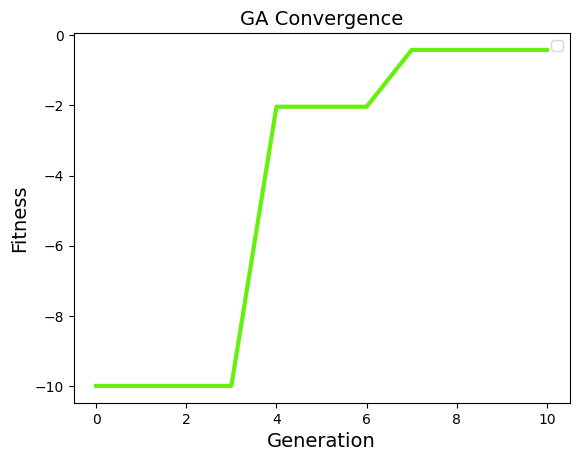

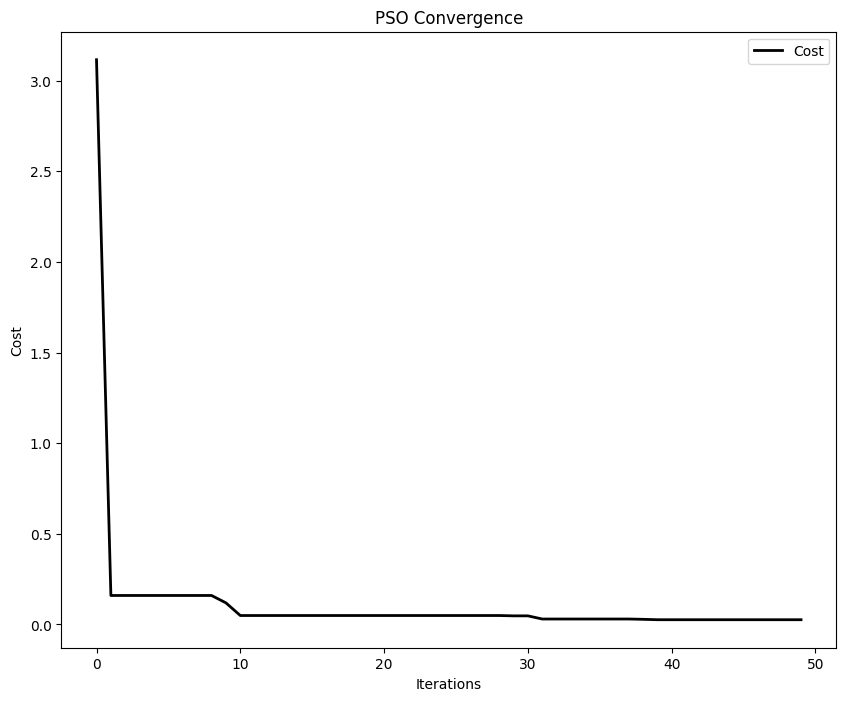

In [ ]:
import numpy as np
import skfuzzy as fuzz
import pygad
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation

# Step 1: Define a Function to Rebuild Fuzzy System
def rebuild_fuzzy_system(cold_params, comfortable_params, hot_params):
    # Define fuzzy variables
    temperature = Antecedent(np.arange(15, 31, 1), 'temperature')
    fan_speed = Consequent(np.arange(0, 101, 1), 'fan_speed')

    # Membership functions
    temperature['cold'] = fuzz.trapmf(temperature.universe, cold_params)
    temperature['comfortable'] = fuzz.trimf(temperature.universe, comfortable_params)
    temperature['hot'] = fuzz.trapmf(temperature.universe, hot_params)

    print("Membership values for temperature:")
    print(f"Cold: {temperature['cold'].mf}")
    print(f"Comfortable: {temperature['comfortable'].mf}")
    print(f"Hot: {temperature['hot'].mf}")

    fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
    fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
    fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])

    # Rules
    rule1 = Rule(temperature['cold'], fan_speed['low'])
    rule2 = Rule(temperature['comfortable'], fan_speed['medium'])
    rule3 = Rule(temperature['hot'], fan_speed['high'])

    # Build control system
    control_system = ControlSystem([rule1, rule2, rule3])
    simulation = ControlSystemSimulation(control_system)

    return simulation

# Step 2: Simplified Evaluation Function (For Debugging)
def evaluate_fuzzy_system(params):
    # Ensure valid membership function ranges
    cold_params = sorted(params[:4])
    comfortable_params = sorted(params[4:7])
    hot_params = sorted(params[7:])

    # Ensure no invalid parameters are being passed
    if any(p < 0 or p > 30 for p in params):
        print(f"Invalid parameters: {params}")
        return 10000  # Fallback value for invalid parameters

    # Rebuild fuzzy system
    simulation = rebuild_fuzzy_system(cold_params, comfortable_params, hot_params)

    # Simulate with test inputs
    simulation.input['temperature'] = 25
    simulation.compute()

    print(f"Simulation inputs: {simulation.input}")
    print(f"Simulation outputs: {simulation.output}")

    # Fallback logic for empty outputs
    if 'fan_speed' not in simulation.output:
        print("No rules fired. Using fallback fan_speed value.")
        return 50.0  # Fallback value for fan_speed

    # Desired vs actual output
    desired_fan_speed = 60
    actual_fan_speed = simulation.output['fan_speed']

    # Minimize error
    return abs(desired_fan_speed - actual_fan_speed)

# Step 3: GA Fitness Function (Error Handling)
def ga_fitness_function(ga_instance, solution, solution_idx):
    print(f"Evaluating solution {solution_idx}: {solution}")
    try:
        fitness_value = -evaluate_fuzzy_system(solution)
        print(f"Fitness value: {fitness_value}")
    except Exception as e:
        print(f"Error evaluating solution {solution_idx}: {e}")
        fitness_value = 10000  # Fallback value for errors
    return fitness_value

# Step 4: GA Setup and Run
gene_space = [
    (15, 17), (17, 19), (19, 21), (21, 23),  # cold
    (18, 22), (22, 25), (25, 28),            # comfortable
    (22, 26), (26, 28), (28, 30), (30, 30)   # hot
]

ga_instance = pygad.GA(
    num_generations=10,  # Reduced generations for debugging
    num_parents_mating=3,
    fitness_func=ga_fitness_function,
    sol_per_pop=5,  # Smaller population for testing
    num_genes=11,
    gene_space=gene_space,
    mutation_percent_genes=10,
    crossover_probability=0.9
)

ga_instance.run()

# Retrieve GA results
ga_best_solution, ga_best_fitness, _ = ga_instance.best_solution()
ga_best_value = -ga_best_fitness
print(f"GA Best Solution: {ga_best_solution}")
print(f"GA Best Value: {ga_best_value}")

# Step 5: Particle Swarm Optimization
def pso_objective_function(x):
    return np.apply_along_axis(evaluate_fuzzy_system, 1, x)

options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
bounds = (
    [15, 15, 15, 15, 18, 18, 18, 22, 22, 22, 22],  # Lower bounds
    [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]   # Upper bounds
)
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=11, options=options, bounds=bounds)

pso_best_value, pso_best_solution = optimizer.optimize(pso_objective_function, iters=50)
print(f"PSO Best Solution: {pso_best_solution}")
print(f"PSO Best Value: {pso_best_value}")

# Step 6: Convergence Plots
# GA Convergence
ga_instance.plot_fitness(title="GA Convergence")

# PSO Convergence
plot_cost_history(optimizer.cost_history)
plt.title("PSO Convergence")
plt.show()
